In [16]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import tree
import seaborn as sns
%matplotlib inline
import scipy 
from scipy.stats import pearsonr

In [3]:
os.chdir("C:\\Users\\justi\\Documents\\Data Science\\Flight Delays")
FlightDelayTrain = pd.read_csv("Flight_Delays_Test.csv")
FlightDelayTest = pd.read_csv("Flight_Delays_Train.csv")
FlightDelaySample = pd.read_csv("Flight_Delays_Train_LIMIT.csv")
FlightDelaySample.head()
FlightDelaySample.info()


C:\Users\justi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 41 columns):
RecordID                250000 non-null int64
YEAR                    250000 non-null int64
MONTH                   250000 non-null int64
DAY                     250000 non-null int64
DAY_OF_WEEK             250000 non-null int64
AIRLINE                 250000 non-null object
AIRLINE_NAME            250000 non-null object
FLIGHT_NUMBER           250000 non-null int64
TAIL_NUMBER             249835 non-null object
ORIGIN_AIRPORT          250000 non-null object
DESTINATION_AIRPORT     250000 non-null object
SCHEDULED_DEPARTURE     250000 non-null int64
DEPARTURE_TIME          247777 non-null float64
DEPARTURE_DELAY         250000 non-null int64
TAXI_OUT                250000 non-null int64
WHEELS_OFF              247718 non-null float64
SCHEDULED_TIME          250000 non-null int64
ELAPSED_TIME            250000 non-null int64
AIR_TIME                250000 non-null int64
DISTAN

### Feature Engineering

##### Feature Engineering- Find All Correlations

In [18]:
print('Dataframe dimensions:', FlightDelaySample.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
FlightDelaySample=pd.DataFrame(FlightDelaySample.dtypes).T.rename(index={0:'column type'})
FlightDelaySample=FlightDelaySample.append(pd.DataFrame(FlightDelaySample.isnull().sum()).T.rename(index={0:'null values (nb)'}))
FlightDelaySample=FlightDelaySample.append(pd.DataFrame(FlightDelaySample.isnull().sum()/FlightDelaySample.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
FlightDelaySample




Dataframe dimensions: (3, 41)


,RecordID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,AIRLINE_NAME,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEPARTURE_DELAY_FLAG
column type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Fill Nulls

In [9]:
df = pd.DataFrame(data={'a':[1,2,3,None],'b':[4,5,None,6],'c':[None,None,7,8]})
print (df)


     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  NaN  7.0
3  NaN  6.0  8.0


In [10]:
df.fillna(value=0, inplace=True)
print (df)

     a    b    c
0  1.0  4.0  0.0
1  2.0  5.0  0.0
2  3.0  0.0  7.0
3  0.0  6.0  8.0


In [12]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


In [22]:
#df2 = pd.DataFrame(FlightDelaySample)
df2 = pd.read_csv("Flight_Delays_Train_LIMIT.csv")
print (df2)
df2.head()

C:\Users\justi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        RecordID  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
0              1  2015      1    5            1      DL   
1              4  2015      1    8            4      DL   
2              5  2015      1    9            5      DL   
3              6  2015      1   10            6      DL   
4             11  2015      1   16            5      DL   
5             12  2015      1   17            6      DL   
6             13  2015      1   19            1      DL   
7             14  2015      1   20            2      DL   
8             15  2015      1   21            3      DL   
9             16  2015      1   22            4      DL   
10            17  2015      1   23            5      DL   
11            18  2015      1   24            6      DL   
12            20  2015      1   27            2      DL   
13            21  2015      1   28            3      DL   
14            26  2015      2    3            2      DL   
15            30  2015      2    7            6      DL 

,RecordID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,AIRLINE_NAME,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEPARTURE_DELAY_FLAG
0,1,2015,1,5,1,DL,Delta Air Lines Inc.,2503,N979AT,ABE,...,0,0,DL,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,1
1,4,2015,1,8,4,DL,Delta Air Lines Inc.,2503,N958AT,ABE,...,0,0,DL,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,0
2,5,2015,1,9,5,DL,Delta Air Lines Inc.,2503,N994AT,ABE,...,0,0,DL,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,1
3,6,2015,1,10,6,DL,Delta Air Lines Inc.,2503,N934AT,ABE,...,0,0,DL,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,0
4,11,2015,1,16,5,DL,Delta Air Lines Inc.,2503,N994AT,ABE,...,0,0,DL,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,0


In [23]:
df3 = pd.DataFrame(df2)
corr = df3.corr()
corr.style.background_gradient().set_precision(2)

C:\Users\justi\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,RecordID,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE,LONGITUDE,DEPARTURE_DELAY_FLAG
RecordID,1,nan,0.3,0.025,-0.005,0.21,0.11,0.12,0.048,0.12,0.12,-0.066,-0.068,-0.077,-0.088,0.079,-0.13,0.084,0.07,0.038,0.0033,-0.018,0.0042,-0.0075,0.029,0.029,-0.005,-0.35,0.38,0.057
YEAR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MONTH,0.3,nan,1,0.0023,-0.013,-0.021,0.004,0.0019,0.00059,-0.0047,-0.00046,0.0089,0.0094,0.0097,0.016,-0.014,0.0071,-0.019,-0.018,-0.011,-0.0025,-0.038,-0.0026,0.0072,-0.0033,0.0036,0.0062,0.0095,-0.0016,-0.022
DAY,0.025,nan,0.0023,1,0.0054,0.0047,-0.002,-0.00096,0.019,-0.011,-0.0023,0.0021,-0.0022,-0.00054,0.0035,-0.0031,-0.0029,-0.0015,-0.0031,0.016,0.0017,0.017,0.00095,0.0028,0.0065,0.015,0.014,0.001,-0.001,0.0057
DAY_OF_WEEK,-0.005,nan,-0.013,0.0054,1,0.012,0.011,0.013,-0.022,-0.046,0.013,0.013,0.0089,0.015,0.015,0.019,0.004,0.012,0.02,-0.033,-0.0013,-0.017,-0.023,0.0017,-0.0021,-0.023,-0.016,0.0072,-0.0083,-0.011
FLIGHT_NUMBER,0.21,nan,-0.021,0.0047,0.012,1,-0.01,-0.00079,0.018,0.025,0.0057,-0.27,-0.26,-0.26,-0.28,-0.0015,-0.098,-0.0099,0.001,0.055,0.0067,0.036,-0.0047,-0.0057,0.048,0.034,-0.02,-0.18,0.15,-0.033
SCHEDULED_DEPARTURE,0.11,nan,0.004,-0.002,0.011,-0.01,1,0.95,0.11,0.069,0.93,-0.032,-0.042,-0.049,-0.044,0.74,-0.047,0.78,0.7,0.089,0.0033,-0.0032,0.013,-0.00041,0.024,0.098,0.038,-0.11,0.11,0.15
DEPARTURE_TIME,0.12,nan,0.0019,-0.00096,0.013,-0.00079,0.95,1,0.12,0.08,0.97,-0.035,-0.045,-0.053,-0.05,0.77,-0.043,0.77,0.74,0.096,0.0031,0.0046,0.035,0.0021,0.039,0.097,0.0052,-0.12,0.12,0.18
DEPARTURE_DELAY,0.048,nan,0.00059,0.019,-0.022,0.018,0.11,0.12,1,0.052,0.099,0.016,0.018,0.01,0.012,0.029,0.024,0.099,0.021,0.95,0.025,-0.019,0.27,0.02,0.65,0.59,0.41,-0.032,0.028,0.47
TAXI_OUT,0.12,nan,-0.0047,-0.011,-0.046,0.025,0.069,0.08,0.052,1,0.11,0.045,0.18,0.054,0.026,0.096,0.016,0.078,0.094,0.24,0.0099,-0.19,0.35,0.0023,0.034,0.026,0.046,-0.12,0.15,0.088


In [15]:
print(corr)


Empty DataFrame
Columns: []
Index: []


In [30]:
FLIGHTS = pd.read_csv("Flight_Delays_Train_LIMIT.csv")
FLIGHTS2=FLIGHTS[['AIR_TIME','AIRLINE_DELAY','SCHEDULED_TIME','DEPARTURE_DELAY']]


C:\Users\justi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


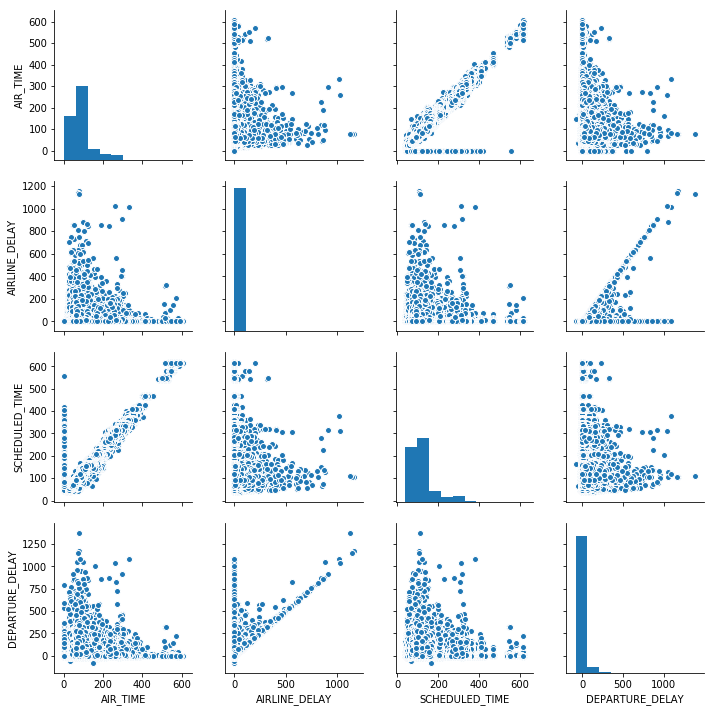

In [31]:
sns.pairplot(FLIGHTS2)

In [32]:
#Pearson Correlation Not overly Valuable
AIR= FlightDelayTest['AIR_TIME']
DIST= FlightDelayTest['DISTANCE']
FLAG= FlightDelayTest['DEPARTURE_DELAY_FLAG']

pearsonr_coefficient, p_value=pearsonr(DIST,FLAG)
print (pearsonr_coefficient)

0.07031656530451645


### Split Data and Score

In [ ]:
#TRAIN_X=FlightDelayTrain[['AIR_TIME','DISTANCE','SCHEDULED_TIME','WEATHER_DELAY','AIRLINE_DELAY','DAY_OF_WEEK']]


#TEST_Y=FlightDelayTest[['DEPARTURE_DELAY_FLAG']]

TRAIN_X=FlightDelayTrain[['AIR_TIME','DISTANCE','SCHEDULED_TIME','DAY_OF_WEEK','MONTH']]
TRAIN_Y=FlightDelayTrain[['DEPARTURE_DELAY_FLAG']]

TEST_X=FlightDelayTest[['AIR_TIME','DISTANCE','SCHEDULED_TIME','DAY_OF_WEEK','MONTH']]

In [ ]:
#decision tree model
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(TRAIN_X, TRAIN_Y)

print(model_tree.feature_importances_)
print(model_tree.score(TRAIN_X, TRAIN_Y))

In [ ]:
TEST_X.head()

In [ ]:
#predict
a = model_tree.predict(TEST_X)

TEST_X["DEPARTURE_DELAY_FLAG_SCORED"]=a

In [ ]:
submission_data = pd.DataFrame({'RecordID':FlightDelayTest['RecordID'],'Delayed':TEST_X["DEPARTURE_DELAY_FLAG_SCORED"]})

submission_data.info()

In [ ]:
submission_data.to_csv("submission_data.csv",index=0)